In [2]:
import json 
import numpy as np
import copy
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [29]:
import colorsys

def generate_colors(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i / float(num_colors)
        rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)
        colors.append(rgb)
    return   (np.array(colors) * 255).astype(int)
colors = generate_colors(34)

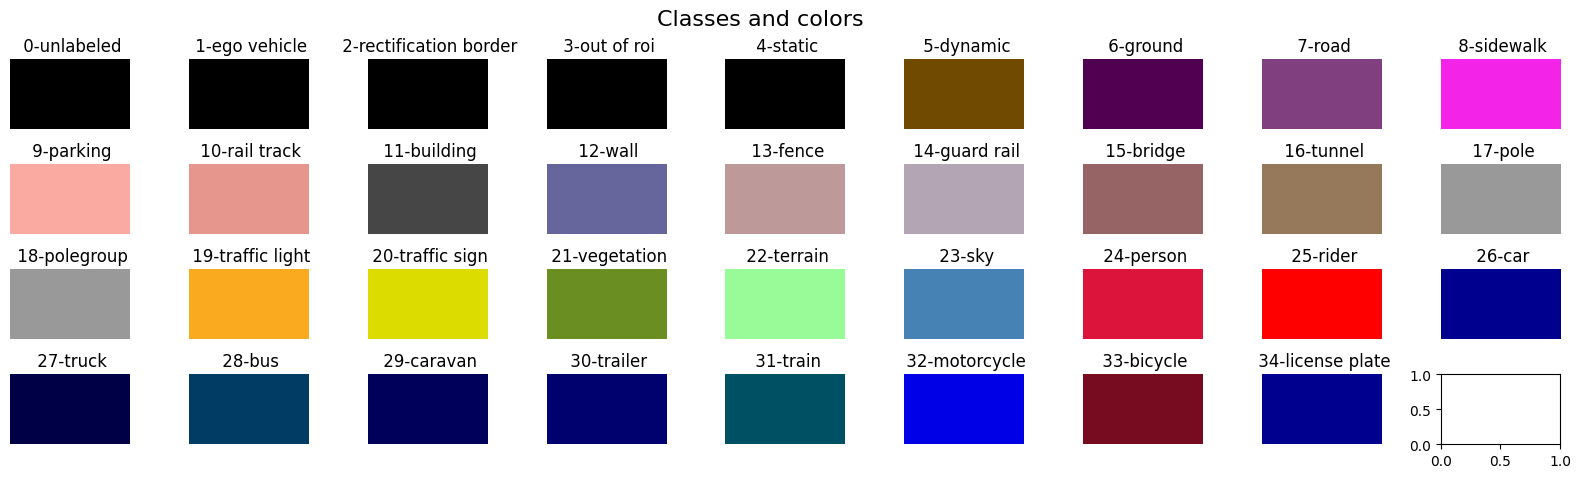

In [30]:
cols=9
rows=4
fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
labels=["unlabeled",'ego vehicle', 'rectification border', 'out of roi' , 'static' , 'dynamic'  , 'ground' ,  'road', 'sidewalk',
'parking', 'rail track' , 'building', 'wall' ,  'fence'       , 'guard rail',  'bridge', 'tunnel' , 'pole', 'polegroup', 
 'traffic light',  'traffic sign' , 'vegetation', 'terrain' , 'sky', 'person'  , 'rider',  'car', 'truck', 'bus' ,  'caravan', 'trailer', 'train', 'motorcycle',
'bicycle'  , 'license plate']
for i, color in enumerate(colors):
     
    row = i // cols
    col = i % cols
    ax[row, col].imshow([[(color[0], color[1],color[2])]], extent=[0, 1, 0, 1], origin='lower', aspect='auto')
    ax[row, col].set_title(f' {i}-{labels[i]}')
    ax[row, col].axis('off')

plt.suptitle('Classes and colors', fontsize=16)
plt.show()


In [31]:
def update_image(image, colors):
    for i in image:
        for j in i:
            lab=j[0]
            for k in range(3):
                j[k]=colors[lab][k]

    return image

# Names of images val

In [32]:
path_images="/tsi/hi-paris/FCCLIP_results/Results_r50_Replace_labels_with_inferences/train_results/fcclip_cocopan_r50_008_1000_test/image"
for  i in os.listdir(path_images):
    print(i)

munster_000142_000019_leftImg8bit.png
munster_000039_000019_leftImg8bit.png
frankfurt_000001_052120_leftImg8bit.png
munster_000066_000019_leftImg8bit.png
munster_000166_000019_leftImg8bit.png
frankfurt_000001_023235_leftImg8bit.png
munster_000016_000019_leftImg8bit.png
frankfurt_000001_058914_leftImg8bit.png
frankfurt_000001_073464_leftImg8bit.png
frankfurt_000001_029086_leftImg8bit.png
munster_000081_000019_leftImg8bit.png
frankfurt_000001_051516_leftImg8bit.png
munster_000156_000019_leftImg8bit.png
munster_000113_000019_leftImg8bit.png
frankfurt_000001_049078_leftImg8bit.png
munster_000036_000019_leftImg8bit.png
munster_000042_000019_leftImg8bit.png
munster_000104_000019_leftImg8bit.png
lindau_000027_000019_leftImg8bit.png
lindau_000045_000019_leftImg8bit.png
munster_000150_000019_leftImg8bit.png
munster_000049_000019_leftImg8bit.png
frankfurt_000001_075296_leftImg8bit.png
frankfurt_000001_066438_leftImg8bit.png
munster_000031_000019_leftImg8bit.png
frankfurt_000001_078803_leftImg8bi

# Plot with name image 

In [33]:
def plot_with_name_image(name, type='infer'):
    plt.figure(figsize=(15, 20))
    ind_image=0
    if type == "infer":
        path_images="/tsi/hi-paris/FCCLIP_results/Results_r50_Replace_labels_with_inferences/train_results/fcclip_cocopan_r50_008_1000_test/image"
    else:
        path_images="/tsi/hi-paris/FCCLIP_results/Results_r50_Replace_labels_with_inferences/train_results/fcclip_cocopan_r50_008_1000_test_train/image"
    
    list_name_=name.split('_')
    path_image_or=os.path.join("/tsi/hi-paris/cityscapes//gtFine/val/", name.split('_')[0],list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_color.png')
    
    with open(os.path.join(path_images, name), "rb") as fp:
        image = pickle.load(fp) 
    or_image = Image.open(os.path.join("/tsi/hi-paris/cityscapes//leftImg8bit/val/", name.split("_")[0],name))
    new_image=update_image(image, colors) 
    plt.subplot(2, 3, ind_image + 1)   
    plt.imshow(new_image )
    plt.axis('off') 
    plt.subplot(2, 3, ind_image + 2)   
    plt.imshow(or_image)
    plt.axis('off')  
    im_or_image = Image.open(path_image_or)
    plt.subplot(2, 3,  ind_image+ 3)   
    plt.imshow(im_or_image)
    plt.axis('off')  
    ind_image+=2  
    plt.tight_layout()   
    plt.show()

In [34]:
image_name='frankfurt_000001_051516_leftImg8bit.png'

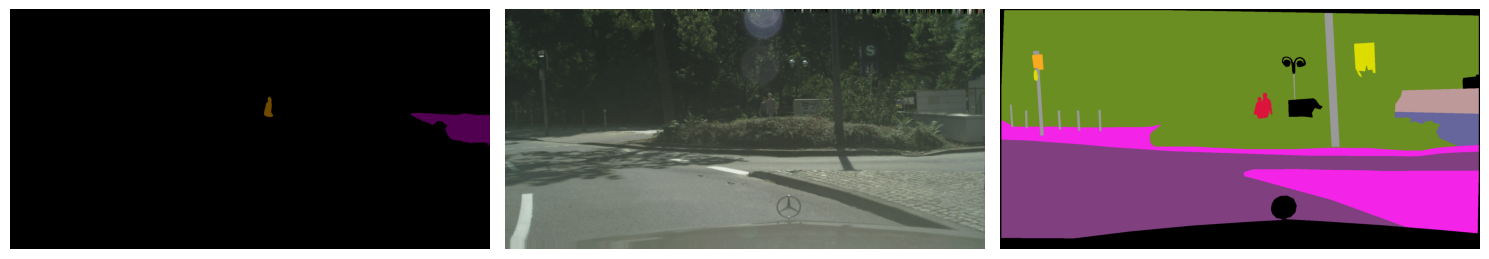

In [35]:
plot_with_name_image(image_name, type='infer') # type : "train" or "infer"

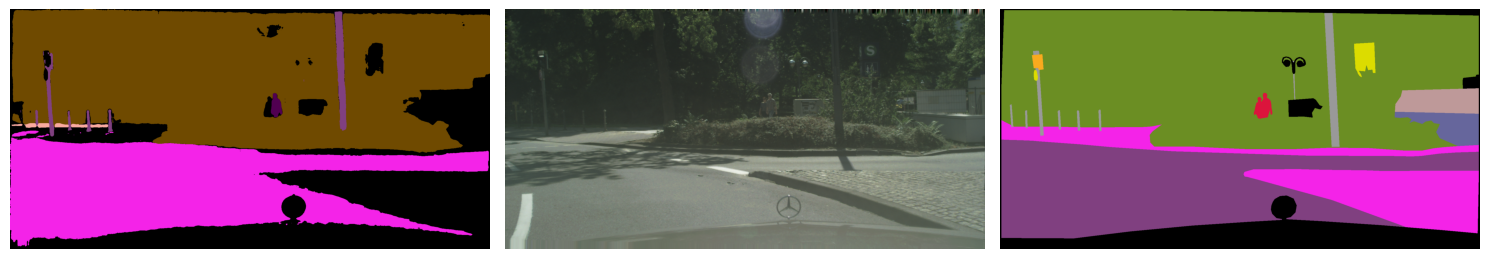

In [36]:

plot_with_name_image(image_name, type='train') # type : "train" or "infer"

In [ ]:
#All results

In [ ]:
path_images="/tsi/hi-paris/FCCLIP_results/Results_r50_Replace_labels_with_inferences/train_results/fcclip_cocopan_r50_008_1000_test/image"
plt.figure(figsize=(15, 10))
ind_image=0
for  i in os.listdir(path_images):
    with open(os.path.join(path_images, i), "rb") as fp:
        image = pickle.load(fp) 

    or_image = Image.open(os.path.join("/home/ids/gbrison/FC/fc-clip/datasets/cityscapes/leftImg8bit/val/", i.split("_")[0],i))
    
    new_image=update_image(image, colors) 
        
    plt.subplot(2, 2, ind_image + 1)   
    plt.imshow(new_image )
    plt.axis('off') 
    plt.subplot(2, 2, ind_image + 2)   
    plt.imshow(or_image)
    plt.axis('off')  
    ind_image+=2
    if ind_image >2:
        break

plt.tight_layout()   
plt.show()
     